In [1916]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.svm import SVC
from sklearn.neighbors import (NeighborhoodComponentsAnalysis, KNeighborsClassifier)
from sklearn.pipeline import Pipeline
from matplotlib import pyplot as plt

In [1917]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image 

In [1918]:
s1 = pd.read_csv('datasets/archive/Sample_1.csv')
s2 = pd.read_csv('datasets/archive/Sample_2.csv')
s3 = pd.read_csv('datasets/archive/Sample_3.csv')
s4 = pd.read_csv('datasets/archive/Sample_4.csv')
s5 = pd.read_csv('datasets/archive/Sample_5_corrected.csv')

In [1919]:
s1.columns, s2.columns, s3.columns, s4.columns, s5.columns

(Index(['p_id', 'age', 'female', 'ethnicity', 'grip', 'chest', 'e_anx_1',
        'e_anx_2', 'e_anx_3', 'e_anx_4', 'e_anx_5', 'e_anx_6', 'e_anx_7',
        'e_anx_8', 'e_anx_9', 'e_anx_10', 'e_dep_1', 'e_dep_2', 'e_dep_3',
        'e_dep_4', 'e_dep_5', 'e_dep_6', 'e_dep_7', 'e_dep_8', 'e_dep_9',
        'e_dep_10', 'e_fear_1', 'e_fear_2', 'e_fear_3', 'e_fear_4', 'e_fear_5',
        'e_fear_6', 'e_fear_7', 'e_fear_8', 'e_fear_9', 'e_fear_10', 'e_sen_1',
        'e_sen_2', 'e_sen_3', 'e_sen_4', 'e_sen_5', 'e_sen_6', 'e_sen_7',
        'e_sen_8', 'e_sen_9', 'e_sen_10'],
       dtype='object'),
 Index(['p_id', 'female', 'grip', 'chest', 'e_anx_1', 'e_anx_2', 'e_anx_3',
        'e_anx_4', 'e_anx_5', 'e_anx_6', 'e_anx_7', 'e_anx_8', 'e_anx_9',
        'e_anx_10', 'e_dep_1', 'e_dep_2', 'e_dep_3', 'e_dep_4', 'e_dep_5',
        'e_dep_6', 'e_dep_7', 'e_dep_8', 'e_dep_9', 'e_dep_10', 'e_fear_1',
        'e_fear_2', 'e_fear_3', 'e_fear_4', 'e_fear_5', 'e_fear_6', 'e_fear_7',
        'e_fear_8', '

Looks like we have different amount of columns in each data set from each Univesity. Sample 1 and Sample 2 have the same columns except for **Age and Ethnicity**, for Sample 1 and 2 we will consider all the other columns and build a machine learning pipeline for predicting the gender of the person depending on their HEXACO personality measure, their chest size and their grip strenght. 

For Sample 3,4 and 5 we will do the same thing but we will ignore the **Ethnicity and Chest Size** of the students and so we can have the same features for the prediction. The gender prediction will be based mostly on the HEXACON personality measure and the grip strength of the participants. 

Because of this I will drop the columns and set the **Participant ID** as the index before splitting the datasets in `Train and Test sets`

In [1920]:
s1.drop(columns=['age', 'ethnicity'], inplace=True)
s3.drop(columns=['ethnicity', 'chest'],inplace=True)
s5.drop(columns=['ethnicity'],inplace=True)

In [1921]:
print('Shape Sample 1:\n',s1.shape,'\nShape Sample 2:\n',s2.shape)
print('Shape Sample 3:\n',s3.shape,'\nShape Sample 4:\n',s4.shape,'\nShape Sample 5:\n',s5.shape)

s1.set_index(['p_id'],inplace=True)
s2.set_index(['p_id'],inplace=True)
s3.set_index(['p_id'],inplace=True)
s4.set_index(['p_id'],inplace=True)
s5.set_index(['p_id'],inplace=True)

Shape Sample 1:
 (175, 44) 
Shape Sample 2:
 (209, 44)
Shape Sample 3:
 (370, 20) 
Shape Sample 4:
 (340, 20) 
Shape Sample 5:
 (305, 20)


In [1922]:
df1=pd.merge(s1,s2, how='outer')
df2=pd.merge(s3,s4, how='outer')
df2=pd.merge(df2,s5, how='outer')

In [1923]:
print('Shape Dataframe 1:\n',df1.shape,'\nShape Dataframe 2:\n',df2.shape)

Shape Dataframe 1:
 (384, 43) 
Shape Dataframe 2:
 (1015, 19)


Now Data frame 1 has all the rows from Sample 1 and Sample 2 with the same column. The same goes for Dataframe 2, it has all the rows from Sample 3, 4 and 5 with the same columns.

# Dataframe 1

In [1924]:
df_train, df_test = train_test_split(df1)

In [1925]:
print('Shape Train :\n',df_train.shape,'\nShape Test :\n',df_test.shape)

Shape Train :
 (288, 43) 
Shape Test :
 (96, 43)


In [1926]:
df_train.head()

,female,grip,chest,e_anx_1,e_anx_2,e_anx_3,e_anx_4,e_anx_5,e_anx_6,e_anx_7,...,e_sen_1,e_sen_2,e_sen_3,e_sen_4,e_sen_5,e_sen_6,e_sen_7,e_sen_8,e_sen_9,e_sen_10
230,0,45,43.0,1,1,1,3,1,7,7,...,5,3,1,7,1,7,7,7,3,7
60,0,38,42.0,5,5,2,3,2,5,5,...,5,4,2,5,3,6,3,4,3,5
93,1,21,8.0,6,7,5,5,4,2,3,...,4,5,2,5,5,4,3,4,2,5
243,0,52,72.0,4,1,1,7,1,4,7,...,4,5,1,5,6,7,7,1,5,7
365,1,24,16.0,5,6,3,7,2,2,3,...,7,3,5,6,5,2,2,3,2,2


In [1927]:
df_train.isnull().sum()

female       0
grip         0
chest        2
e_anx_1      0
e_anx_2      0
e_anx_3      0
e_anx_4      0
e_anx_5      0
e_anx_6      0
e_anx_7      0
e_anx_8      0
e_anx_9      0
e_anx_10     0
e_dep_1      0
e_dep_2      0
e_dep_3      0
e_dep_4      0
e_dep_5      0
e_dep_6      0
e_dep_7      0
e_dep_8      0
e_dep_9      0
e_dep_10     0
e_fear_1     0
e_fear_2     0
e_fear_3     0
e_fear_4     0
e_fear_5     0
e_fear_6     0
e_fear_7     0
e_fear_8     0
e_fear_9     0
e_fear_10    0
e_sen_1      0
e_sen_2      0
e_sen_3      0
e_sen_4      0
e_sen_5      0
e_sen_6      0
e_sen_7      0
e_sen_8      0
e_sen_9      0
e_sen_10     0
dtype: int64

**There is ONE explicit NULL values**
Now we check if there are any implicit Null values. We will check only for `Age, Gender, Ethnicity and Grip` since all the other features need to have a value by the nature of the set. A number needs to be selected from 1 to 7.

In [1928]:
df_train['female'].value_counts()

1    145
0    143
Name: female, dtype: int64

In [1929]:
df_train['grip'].value_counts()

30    22
48    13
25    12
40    12
26    11
32    11
24    10
50     9
27     9
44     9
42     9
52     9
29     8
28     8
38     8
34     8
22     8
46     7
54     7
31     7
51     6
41     6
33     6
45     5
36     5
49     5
37     4
58     4
61     4
47     4
19     4
55     4
43     3
16     3
35     3
56     3
18     2
59     2
53     2
21     2
63     2
39     2
60     2
57     2
64     1
20     1
17     1
13     1
23     1
68     1
Name: grip, dtype: int64

In [1930]:
pd.set_option("display.max_rows", None)
df_train['chest'].value_counts()

20.0    17
18.0    12
32.0    11
16.0    11
40.0     9
15.0     9
26.0     9
52.0     8
22.0     8
24.0     8
42.0     7
34.0     7
23.0     7
25.0     7
13.0     7
14.0     7
46.0     7
36.0     6
50.0     5
21.0     5
45.0     5
48.0     5
38.0     5
29.0     5
28.0     5
19.0     5
8.0      4
11.0     4
27.0     4
31.0     4
55.0     4
62.0     4
59.0     4
12.0     3
17.0     3
56.0     3
49.0     3
58.0     3
35.0     3
30.0     3
44.0     2
54.0     2
64.0     2
60.0     2
43.0     2
37.0     2
69.0     2
57.0     2
66.0     2
41.0     2
33.0     2
39.0     2
63.0     2
75.0     1
67.0     1
68.0     1
47.0     1
65.0     1
53.0     1
51.0     1
9.0      1
6.0      1
72.0     1
61.0     1
73.0     1
76.0     1
77.0     1
Name: chest, dtype: int64

**No signs of implicit Null values** where found. 

### Changes to be made
 - Get rid of the Null values 
 - Rename column `female` to `gender`
 - Change the values from gender to categorical values, so we can apply OneHotEncoder 
 - Standardize the numerical features, in this case we have 3 different measurements,`Kilograms for Grip`, `Centimeters for Chest` and ` 1-7 for the HEXACO Personality Measure`. Standardizing the numerical features will help our model for the optimization using the Gradient Descent

In [1931]:
#Changes to Train Set
df_train.dropna(inplace=True)
df_train.rename(columns={'female':'gender'}, inplace=True)
df_train['gender'].replace({1:'female', 0:'male'}, inplace=True)

#Changes to Test Set
df_test.dropna(inplace=True)
df_test.rename(columns={'female':'gender'}, inplace=True)
df_test['gender'].replace({1:'female', 0:'male'}, inplace=True)

In [1932]:
df_train.head()

,gender,grip,chest,e_anx_1,e_anx_2,e_anx_3,e_anx_4,e_anx_5,e_anx_6,e_anx_7,...,e_sen_1,e_sen_2,e_sen_3,e_sen_4,e_sen_5,e_sen_6,e_sen_7,e_sen_8,e_sen_9,e_sen_10
230,male,45,43.0,1,1,1,3,1,7,7,...,5,3,1,7,1,7,7,7,3,7
60,male,38,42.0,5,5,2,3,2,5,5,...,5,4,2,5,3,6,3,4,3,5
93,female,21,8.0,6,7,5,5,4,2,3,...,4,5,2,5,5,4,3,4,2,5
243,male,52,72.0,4,1,1,7,1,4,7,...,4,5,1,5,6,7,7,1,5,7
365,female,24,16.0,5,6,3,7,2,2,3,...,7,3,5,6,5,2,2,3,2,2


## Separating features
In this step I will separate the target label,`Gender`, from all the other features

In [1933]:
x_train = df_train.drop(['gender'], axis=1)
y_train = df_train['gender']

x_test = df_test.drop(['gender'], axis=1)
y_test = df_test['gender']

# Std Scaler

In [1934]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [1935]:
sm = RandomOverSampler()
x_train, y_train = sm.fit_resample(x_train,y_train)
y_train.value_counts()

male      144
female    144
Name: gender, dtype: int64

# Logistic Regression Model

In [1936]:
# log = LogisticRegression(max_iter=4000)
# log.fit(x_train, y_train)

In [1937]:
# y_predict = log.predict(x_test)
# y_predict

In [1938]:
# print('Accuracy Score:',(accuracy_score(y_test, y_predict)*100),'%')

# Decision Tree

In [1939]:
clf = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=6, min_samples_split=3,
                             min_samples_leaf=3, min_weight_fraction_leaf=0.0, max_features=None,
                             random_state= None, max_leaf_nodes=None, min_impurity_decrease=0.0,
                             class_weight=None, ccp_alpha=0.0)
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=3,
                       min_samples_split=3)

In [1940]:
y_predict2 = clf.predict(x_test)
y_predict2

array(['female', 'male', 'male', 'female', 'female', 'male', 'male',
       'male', 'male', 'female', 'female', 'female', 'female', 'male',
       'female', 'male', 'female', 'male', 'male', 'male', 'female',
       'male', 'male', 'female', 'female', 'male', 'female', 'male',
       'female', 'male', 'male', 'female', 'male', 'female', 'male',
       'male', 'male', 'female', 'female', 'female', 'male', 'female',
       'female', 'male', 'male', 'female', 'female', 'female', 'female',
       'male', 'male', 'female', 'female', 'female', 'female', 'female',
       'female', 'female', 'male', 'male', 'female', 'male', 'male',
       'female', 'female', 'male', 'male', 'female', 'female', 'male',
       'male', 'male', 'male', 'female', 'female', 'male', 'male', 'male',
       'female', 'female', 'female', 'female', 'female', 'male', 'female',
       'male', 'female', 'male', 'female', 'female', 'female', 'female',
       'female', 'male', 'male', 'male'], dtype=object)

In [1941]:
print('Accuracy Score:',(accuracy_score(y_test, y_predict2)*100),'%')

Accuracy Score: 81.25 %


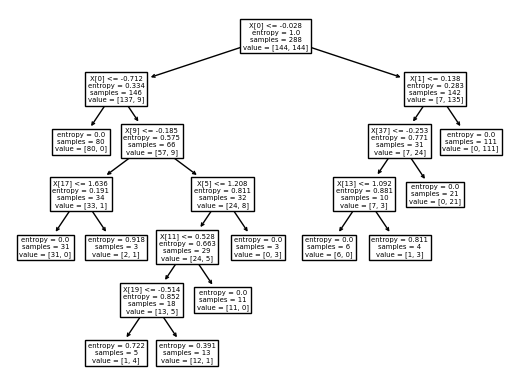

In [1942]:
tree.plot_tree(clf)
plt.show()

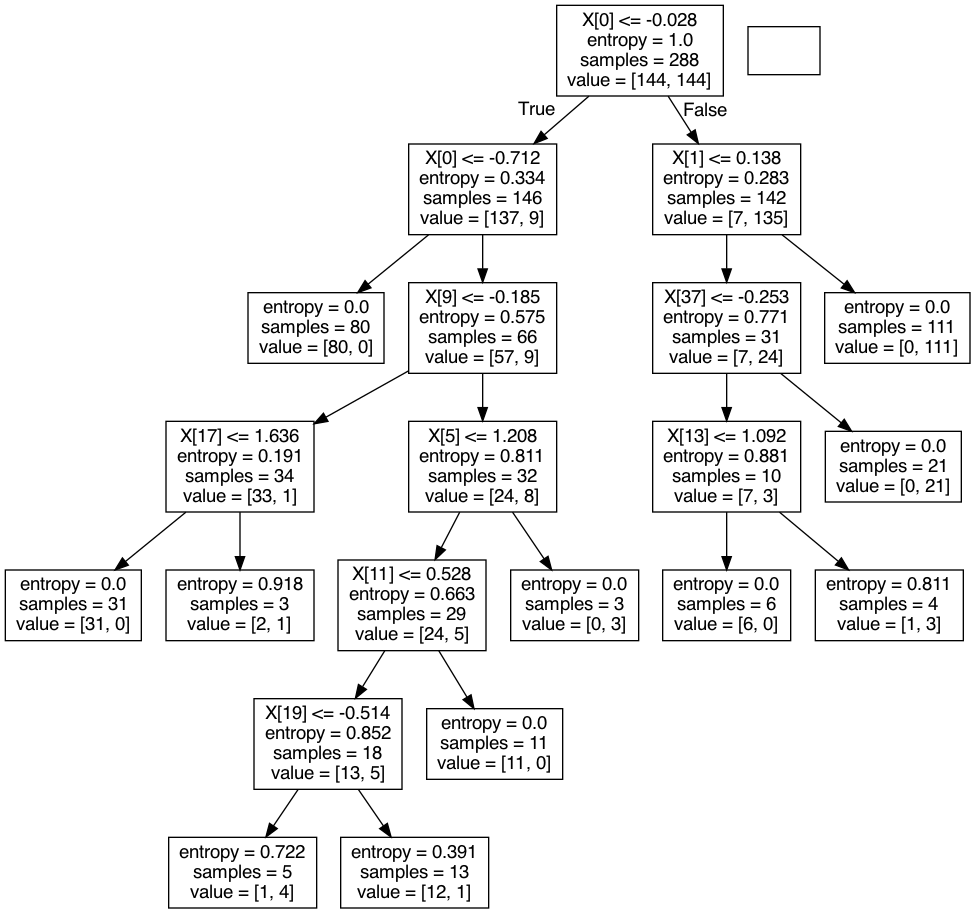

In [1943]:
dot_data=tree.export_graphviz(clf)
graph = pydotplus.graph_from_dot_data(dot_data)  
graph = Image(graph.create_png())
graph

# Dataframe 2

In [1944]:
df2_train, df2_test = train_test_split(df2)

In [1945]:
df2_train

,age,female,grip,hex_5,hex_11,hex_17,hex_23,hex_29,hex_35,hex_41,hex_47,hex_53,hex_59,hex_65,hex_71,hex_77,hex_83,hex_89,hex_95
236,19.0,0,44.00,5.0,3,2,4,2,4,4,4,4.0,2.0,4,3.0,2.0,4,3,2
351,21.0,1,22.00,4.0,5,4,4,1,1,2,4,4.0,2.0,5,5.0,1.0,5,2,1
182,18.0,0,38.00,4.0,4,1,4,4,1,2,5,4.0,5.0,2,2.0,3.0,5,5,2
837,19.0,0,33.51,2.0,4,3,2,3,4,3,3,2.0,4.0,3,3.0,5.0,3,4,4
322,19.0,0,46.00,5.0,5,3,4,5,2,5,3,1.0,4.0,5,5.0,3.0,5,1,1
548,19.0,0,36.77,3.0,4,3,2,2,3,2,4,4.0,5.0,4,4.0,2.0,5,2,2
466,18.0,1,32.27,4.0,5,2,1,4,5,3,2,3.0,5.0,4,3.0,3.0,4,4,1
639,20.0,0,44.77,4.0,3,4,2,5,1,2,4,5.0,1.0,3,4.0,2.0,3,4,2
72,18.0,1,10.00,5.0,5,5,5,1,1,1,4,4.0,2.0,4,5.0,1.0,5,4,2
983,20.0,1,11.23,4.0,4,4,4,2,2,4,4,4.0,2.0,4,4.0,4.0,5,3,2


Same process as before, lets do some cleaning. Searching for missing values

In [1946]:
df2_train.isnull().sum()

age       8
female    0
grip      0
hex_5     2
hex_11    0
hex_17    0
hex_23    0
hex_29    0
hex_35    0
hex_41    0
hex_47    0
hex_53    1
hex_59    1
hex_65    0
hex_71    2
hex_77    1
hex_83    0
hex_89    0
hex_95    0
dtype: int64

In [1947]:
df2_train['age'].value_counts()

19.0    309
18.0    239
20.0    103
21.0     57
22.0     25
23.0      8
24.0      2
29.0      2
30.0      2
26.0      2
38.0      1
25.0      1
28.0      1
27.0      1
Name: age, dtype: int64

In [1948]:
df2_train['female'].value_counts()

1    428
0    333
Name: female, dtype: int64

In [1949]:
df2_train['grip'].value_counts()

20.00     17
22.00     15
30.00     13
18.00     12
17.00     12
26.00     11
25.00     10
36.00     10
34.00      9
28.00      9
15.00      9
40.00      9
10.00      8
24.00      8
32.00      8
12.00      7
38.00      7
46.00      7
21.00      7
50.00      7
16.00      6
42.00      6
14.00      6
44.00      5
27.00      5
45.00      4
48.00      4
23.00      4
31.00      3
22.95      3
19.00      3
35.00      3
24.55      3
13.00      3
26.45      3
27.18      3
22.05      3
39.00      3
41.50      3
31.82      3
35.23      3
29.00      3
15.91      3
23.91      2
20.91      2
20.55      2
27.05      2
30.45      2
36.36      2
18.77      2
22.74      2
27.73      2
13.18      2
29.55      2
25.32      2
25.77      2
24.77      2
19.17      2
21.16      2
11.00      2
39.09      2
31.11      2
23.41      2
18.18      2
24.91      2
31.55      2
25.45      2
43.00      2
25.95      2
19.55      2
24.50      2
26.68      2
51.95      2
19.95      2
37.82      2
41.36      2
60.00      2

In [1950]:
avg_age_train=df2_train['age'].mean()
avg_age_test=df2_test['age'].mean()

df2_train.fillna(avg_age_train,inplace=True)
df2_test.fillna(avg_age_test,inplace=True)

In [1951]:
df2_train.dropna(inplace=True)

df2_test.dropna(inplace=True)

In [1952]:
df2_train.isnull().sum()

age       0
female    0
grip      0
hex_5     0
hex_11    0
hex_17    0
hex_23    0
hex_29    0
hex_35    0
hex_41    0
hex_47    0
hex_53    0
hex_59    0
hex_65    0
hex_71    0
hex_77    0
hex_83    0
hex_89    0
hex_95    0
dtype: int64

In [1953]:
df2_train.rename(columns={'female':'gender'}, inplace=True)
#df2_train['gender'].replace({1:'female', 0:'male'}, inplace=True)

df2_test.rename(columns={'female':'gender'}, inplace=True)
#df2_test['gender'].replace({1:'female', 0:'male'}, inplace=True)


In [1954]:
#TreeClassifier
x_train_tree = df2_train.drop(['gender'], axis=1)
y_train_tree = df2_train['gender']

x_test_tree = df2_test.drop(['gender'], axis=1)
y_test_tree = df2_test['gender']
#LOG
x_train_log = df2_train.drop(['gender'], axis=1)
y_train_log = df2_train['gender']

x_test_log = df2_test.drop(['gender'], axis=1)
y_test_log = df2_test['gender']
#SVM
x_train_svm = df2_train.drop(['gender'], axis=1)
y_train_svm = df2_train['gender']

x_test_svm = df2_test.drop(['gender'], axis=1)
y_test_svm = df2_test['gender']
#rdm
x_train_rdm = df2_train.drop(['gender'], axis=1)
y_train_rdm = df2_train['gender']

x_test_rdm = df2_test.drop(['gender'], axis=1)
y_test_rdm = df2_test['gender']

In [1955]:
scaler = StandardScaler()
#Tree
x_train_tree = scaler.fit_transform(x_train_tree)
x_test_tree = scaler.transform(x_test_tree)
#LOG
x_train_log = scaler.fit_transform(x_train_log)
x_test_log = scaler.transform(x_test_log)
#SVM
x_train_svm = scaler.fit_transform(x_train_svm)
x_test_svm = scaler.transform(x_test_svm)
#KNN
x_train_rdm = scaler.fit_transform(x_train_rdm)
x_test_rdm = scaler.transform(x_test_rdm)

In [1956]:
sm = RandomOverSampler()
#TREE
x_train_tree, y_train_tree = sm.fit_resample(x_train_tree,y_train_tree)
y_train_tree.value_counts()
#LOG
x_train_log, y_train_log = sm.fit_resample(x_train_log,y_train_log)
y_train_log.value_counts()
#SVM
x_train_svm, y_train_svm = sm.fit_resample(x_train_svm,y_train_svm)
y_train_svm.value_counts()
#Knn
x_train_rdm, y_train_rdm = sm.fit_resample(x_train_rdm,y_train_rdm)
y_train_rdm.value_counts()

0    428
1    428
Name: gender, dtype: int64

In [1957]:
clf2 = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=4,
                             min_samples_leaf=3, min_weight_fraction_leaf=0.0, max_features=None,
                             random_state= None, max_leaf_nodes=None, min_impurity_decrease=0.0,
                             class_weight=None, ccp_alpha=0.0)
clf2.fit(x_train_tree, y_train_tree)

DecisionTreeClassifier(min_samples_leaf=3, min_samples_split=4)

In [1958]:
y_predict_tree = clf2.predict(x_test_tree)
y_predict_tree

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1])

In [1959]:
print('Accuracy Score:',(accuracy_score(y_test_tree, y_predict_tree)*100),'%')

Accuracy Score: 85.03937007874016 %


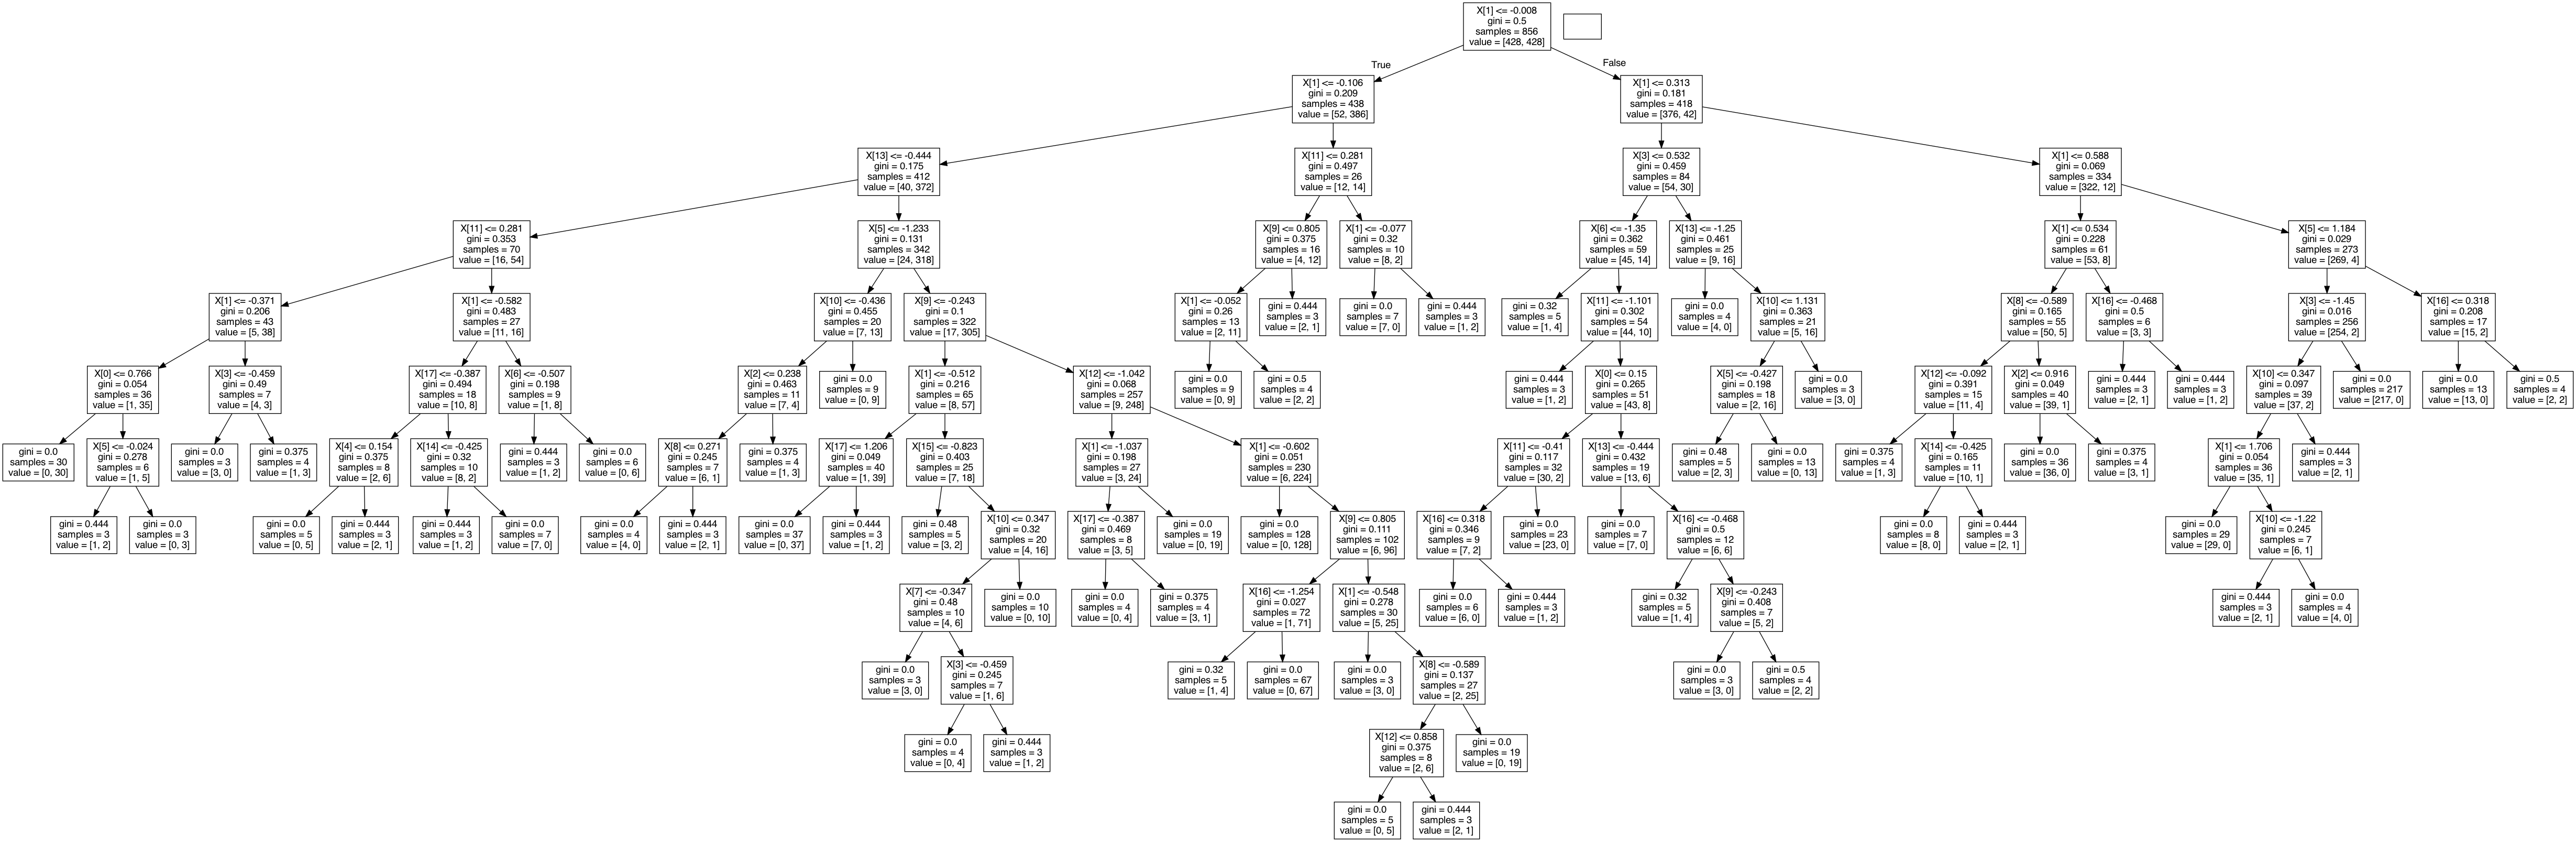

In [1960]:
dot_data=tree.export_graphviz(clf2)
graph = pydotplus.graph_from_dot_data(dot_data)  
graph = Image(graph.create_png())
graph

In [1961]:
log2 = LogisticRegression(max_iter=4000)
log2.fit(x_train_log, y_train_log)

LogisticRegression(max_iter=4000)

In [1962]:
y_predict_log = log2.predict(x_test_log)
y_predict_log

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1])

In [1963]:
print('Accuracy Score:',(accuracy_score(y_test_log, y_predict_log)*100),'%')

Accuracy Score: 89.37007874015748 %


In [1964]:
svc = SVC()
svc.fit(x_train_svm, y_train_svm)

SVC()

In [1965]:
y_predict_svm = svc.predict(x_test_svm)
y_predict_svm

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1])

In [1966]:
print('Accuracy Score:',(accuracy_score(y_test_svm, y_predict_svm)*100),'%')

Accuracy Score: 88.58267716535433 %


In [1967]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [1968]:
clf3 = RandomForestClassifier(n_estimators=100,criterion='gini')
clf3.fit(x_train_rdm, y_train_rdm)
prediction = clf3.predict(x_test_rdm)

print('Accuracy Score:',(accuracy_score(y_test_rdm, prediction)*100),'%')

Accuracy Score: 88.9763779527559 %


In [1969]:
from sklearn.metrics import RocCurveDisplay


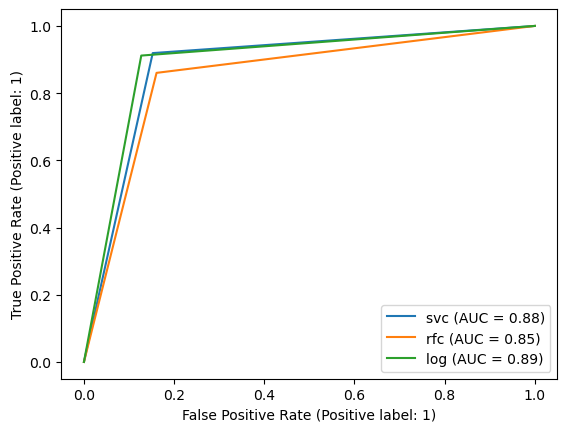

In [1970]:
svc_disp = RocCurveDisplay.from_predictions(y_test_svm,y_predict_svm,name='svc')

ax = plt.gca()

rfc_disp = RocCurveDisplay.from_predictions(y_test_tree, y_predict_tree, ax=ax, name='rfc')
log2_disp = RocCurveDisplay.from_predictions(y_test_log, y_predict_log, ax=ax, name='log')
clf2_disp = RocCurveDisplay.from_predictions(y_test_, y_predict_log, ax=ax, name='log')
plt.show()